# COMPUTATIONAL SYSTEMS BIOLOGY
## Gene regulatory networks - Notebook II

---
Comment the results that you have obtained, creating new markdown cells whenever necessary.
To submit your report, save the notebook clicking on `File > Download as > Notebook` in the menu at the top of the page. Rename the notebook file to `grn2_name.ipybn`, where `name` is your last name. Submit the resulting file through the Aula Global.

IMPORTANT: Before the final submission, remember to reset the kernel and re-run the whole notebook again to check that it works.

---

First we load all necessary modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, dblquad
%matplotlib inline

## Mutual inhibition

The following model describes two proteins that inhibit each other's expression:

$$
\frac{dA}{dt}=\frac{\alpha_a}{1+(B/k_b)^n}-\delta_a A
$$
$$
\frac{dB}{dt}=\frac{\alpha_b}{1+(A/k_a)^n}-\delta_b B
$$

We will consider the following parameters: $\alpha_a=\alpha_b=0.2$, $k_a=k_b=10$ nM, $n=10$, and $\delta_a=\delta_b=1/100$ 1/min. First, we plot the phase plane including the nulclines and slope field.

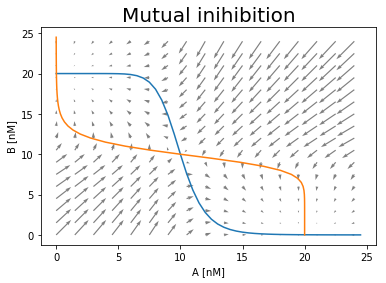

In [2]:
alpha = 0.2
k = 10
n = 10
delta = 1/100

def f_A(A, t):
    return(alpha/(1 + (B/k)**n) - delta*A)

def f_B(B, t):
    return(alpha/(1 + (A/k)**n) - delta*B)

def line_mesh(AB, t):
    A, B = AB
    dAdt = (alpha/(1 + (B/k)**n) - delta*A)
    dBdt = (alpha/(1 + (A/k)**n) - delta*B)
    return [dAdt, dBdt]

#Creating temporal arrays
aux_array_a =[]
aux_array_b = []

tvec = np.arange(0, 1000, 1)
Concentration_over_time = np.arange(0,25,0.5)

A = 0
for B in Concentration_over_time:
    Int_A = odeint(f_A, A, tvec)
    aux_array_a.append(Int_A[-1][0])
    
B = 0
for A in Concentration_over_time:
    Int_B = odeint(f_B, B, tvec)
    aux_array_b.append(Int_B[-1][0])

#Plotting 2 lines
plt.plot(Concentration_over_time,aux_array_b)
plt.plot(aux_array_a, Concentration_over_time)
plt.ylabel("B [nM]")
plt.xlabel("A [nM]")
plt.title("Mutual inihibition", fontsize=20)
#Plotting Mesh Grid
mesh_dimension = np.arange(0,25, 1.5)
X_dim, Y_dim = np.meshgrid(mesh_dimension, mesh_dimension)
U_vec, V_vec = line_mesh([X_dim,Y_dim], tvec)
plt.quiver(X_dim,Y_dim,U_vec,V_vec, color="Gray")

plt.show()

We can see a positive feedback behaviour. It is caracterized by 2 attraction points. A concentration depends on B concentration, and vice versa. We can see a repulsion point right on 10 nM of each compound.

Next we superimpose a few typical trajectories.

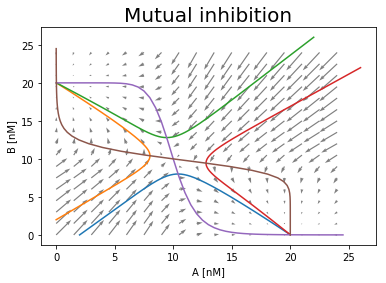

In [3]:
#Defining initial conditions
initial_test = ([2,0], [0,2], [22,26], [26,22])

tvec = np.arange(0,1000,1)

for experiment in initial_test:
    trajectory = odeint(line_mesh, experiment, tvec)
    plt.plot(trajectory[:,0], trajectory[:,1])
    
#Plotting 2 lines
plt.plot(Concentration_over_time,aux_array_b)
plt.plot(aux_array_a, Concentration_over_time)
plt.title("Mutual inhibition", fontsize = 20)
plt.ylabel("B [nM]")
plt.xlabel("A [nM]")
   
#Plotting Mesh Grid
mesh_dimension = np.arange(0,25, 1.5)
X_dim, Y_dim = np.meshgrid(mesh_dimension, mesh_dimension)
U_vec, V_vec = line_mesh([X_dim,Y_dim], tvec)
plt.quiver(X_dim,Y_dim,U_vec,V_vec, color="Gray")

plt.show()


We can see 4 initial contiditions, and we can see how these evolve and end up to different atractions points. Little difference in concentrations at initial states, may influence in the ending stable point (Examples: line blue vs yellow, and line green vs red)

## Activator-repressor circuit

We now consider the genetic circuit shown below, in which gene $a$ activates its own transcription, and also the transcription of gene $b$. The product of the latter gene, $B$, represses the product of $a$, $A$, by binding to it and leading to its degradation. Assuming that (1) the positive feedback of $a$ on itself follows a Hill function with
cooperativity $n$, (2) the activation of $b$ by $A$ is linear in $A$, (3) the degradation of $A$ by $B$ follows the standard mass action kinetics, and (4) both $A$ and $B$ are subject to linear decay (for instance due to dilution), the model of this circuit can be written as:

<img style="margin: 20px; float: right" src="http://dsb.upf.edu/biocomp/figs/act_rep.png" width="25%"/>

$$\begin{aligned}
&\frac{dA}{dt}=a_a+\frac{b_aA^n}{k^n+A^n}-\gamma A B-\delta_a A
\\
&\frac{dB}{dt}=a_b+b_bA-\delta_B B
\end{aligned}$$

We choose the following parameter values: $a_a=5$, $a_b=0.3$, $b_a = 100$, $b_b = 0.04$, $k = 10$, $n=2$, $\gamma=0.1$, and $\delta_a=\delta_b=0.01$. Plot the phase plane of the system including the nulclines, slope field, and representative trajectories.

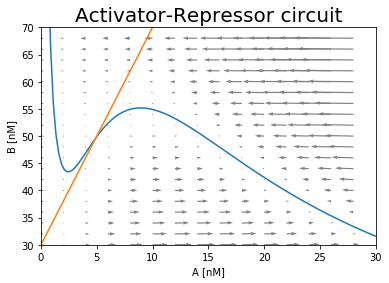

In [4]:
a_subA = 5
a_subB = 0.3
b_subA = 100
b_subB = 0.04
k = 10
n = 2
gamma = 0.1
delta = 0.01

conc_vec = np.arange(0.1, 100, 0.25)
tvec = np.arange(1, 1000, 1)

def mesh_grid(AB, t):
    A, B = AB
    dAdt = a_subA + (b_subA*(A**n))/((k**n) + A**n) - (gamma*A*B) - (delta*A)
    dBdt = a_subB + (b_subB*A) - (delta*B)
    return[dAdt, dBdt]

def null_points(A_vec, B_vec):
    solution_A = ((delta*B_vec)-a_subB)/b_subB
    solution_B = (a_subA +(b_subA*(A_vec**n))/((k**n) + A_vec**n) - delta*A_vec)/(gamma*A_vec)
    return[solution_A, solution_B]

A_sol, B_sol = null_points(conc_vec, conc_vec)
plt.plot(conc_vec, B_sol, label="A")
plt.plot(A_sol, conc_vec, label="B")
plt.xlim(0,30)
plt.ylim(30,70)
plt.ylabel("B [nM]")
plt.xlabel("A [nM]")
plt.title("Activator-Repressor circuit", fontsize = 20)


#Plotting Mesh Grid
X_dim, Y_dim = np.meshgrid(np.arange(0,30,2), np.arange(30,70,2))
U_vec, V_vec = mesh_grid([X_dim,Y_dim], tvec)
plt.quiver(X_dim,Y_dim,U_vec,V_vec, color="Gray")

plt.show()


The system tends to the point where the lines collide. 

Next we superimpose a few typical trajectories and plot the time series of one of them.

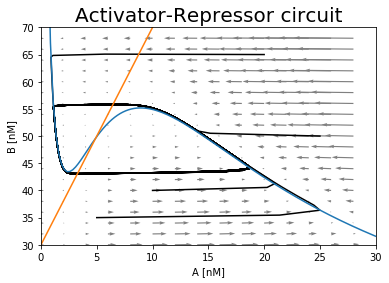

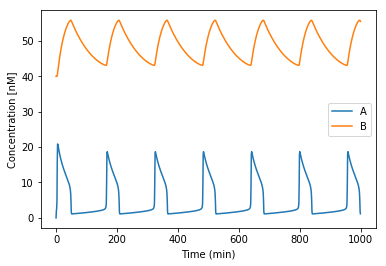

In [5]:
initial_test = ([5,35], [10,40], [20,65], [25,50])

tvec = np.arange(0,1000,1)

for experiment in initial_test:
    trajectory = odeint(mesh_grid, experiment, tvec)
    plt.plot(trajectory[:,0], trajectory[:,1], color="Black")
    
plt.plot(conc_vec, B_sol, label="A")
plt.plot(A_sol, conc_vec, label="B")
plt.xlim(0,30)
plt.ylim(30,70)
plt.ylabel("B [nM]")
plt.xlabel("A [nM]")
plt.title("Activator-Repressor circuit", fontsize = 20)

#Plotting Mesh Grid
X_dim, Y_dim = np.meshgrid(np.arange(0,30,2), np.arange(30,70,2))
U_vec, V_vec = mesh_grid([X_dim,Y_dim], tvec)
plt.quiver(X_dim,Y_dim,U_vec,V_vec, color="Gray")

plt.show()

#Examples
Solution = odeint(mesh_grid, [0,40], tvec)
plt.plot(tvec, Solution[:,0], label="A")
plt.plot(tvec, Solution[:,1], label="B")
plt.ylabel("Concentration [nM]")
plt.xlabel("Time (min)")
plt.legend(fontsize=10)
plt.show()


We can see that this system, kind of behaves like a negative feedback (we can see an atractive point). However we can see that the system will never reach it. 

Independly of the initial conditions, we will end up in the same oscilatory system. This means that small perturbartions of the system will not affect the homeostasis of the system. Overall the system is very robust. 
